# Retro Contest Plots

This notebook draws plots of agents with the data available at `/data` folder.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

## Retrieve Data

First, we retrieve all data from text files in `/data` folder.

In [2]:
def get_agents_data():
    agents_data = []
    for file in os.listdir('./data'):
        if file.endswith('.txt'):
            with open(os.path.join('./data', file), 'r') as stream:
                agent_name = file[:-4]
                agent_tag = ''
                data = [
                    { 'xs': [], 'ys': [] },
                    { 'xs': [], 'ys': [] },
                    { 'xs': [], 'ys': [] },
                    { 'xs': [], 'ys': [] },
                    { 'xs': [], 'ys': [] },
                    { 'xs': [], 'ys': [] },
                ]

                for line in stream.readlines():
                    words = line.split('|')
                    words = [word.strip() for word in words]

                    # Date, Tag, Status, Average Score
                    _, agent_tag, _, avg_score = words[0:4]

                    task_progress = [''] * 5
                    task_score = [''] * 5
                    
                    for i in range(5):
                        # Task Number, Status, Progress, Score
                        _, _, task_progress[i], task_score[i] = words[4*i+4:4*i+8]

                    # Compute Average Progress and Save Data
                    avg_progress = get_avg_progress(task_progress)
                    if avg_progress is not None:
                        data[0]['xs'].append(avg_progress)
                        data[0]['ys'].append(float(avg_score))

                    # Save Task Progress and Score
                    for task in range(1, 6):
                        if task_progress[task - 1] not in ['N/A', ''] and task_score[task - 1] != 'pending':
                            data[task]['xs'].append(float(task_progress[task - 1][:-1]))
                            data[task]['ys'].append(float(task_score[task - 1]))
            
            agents_data.append({
                'name': agent_name,
                'tag': agent_tag,
                'data': data,
            })

    return agents_data

In [3]:
def get_avg_progress(task_progress):
    """
    Compute average progress from list of task progresses.
    """
    sum_progress = 0
    sum_count = 0
    for progress in task_progress:
        if progress not in ['N/A', '']:
            sum_progress += float(progress[:-1])
            sum_count += 1

    return sum_progress / sum_count if sum_count > 0 else None

Then, we use helper methods to get individual agent's data by its name or tag.

In [4]:
def get_agent_data_by_tag(agent_tag):
    for agent in agents_data:
        if agent['tag'] == agent_tag:
            return agent
    return None

In [5]:
def get_agent_data_by_name(agent_name):
    for agent in agents_data:
        if agent['name'] == agent_name:
            return agent
    return None

We also want to see when the agent learns most rapidly, so we add a helper function that calculates the deltas of a list.

In [6]:
def get_delta(list_):
    """
    Returns list of deltas of a given list. The list is prepended with 0 to
    match length with the original list.
    """
    deltas = [0]
    for i, elem in enumerate(list_):
        if i == len(list_)-1:
            break
        deltas.append(list_[i+1] - elem)
    
    return deltas

## Plot Data

In [7]:
def plot_scores(agent, show=True, filename=None):
    """
    Plots average score and task scores for given agent. Shows file if
    show=True. Saves file if filename is specified.
    """
    xs, ys = agent['data'][0]['xs'], agent['data'][0]['ys']
    plt.plot(xs, ys, 'k', linewidth=4)

    for task in agent['data'][1:]:
        plt.plot(task['xs'], task['ys'])

    plt.legend(['Average', 'Task #1', 'Task #2', 'Task #3', 'Task #4', 'Task #5'])
    plt.xlabel('Progress (%)')
    plt.xlim([0, 100])
    plt.ylabel('Score')
    plt.ylim([0, 8000])
    plt.title(agent['name'])
    
    if filename:
        plt.savefig(filename)
    if show:
        plt.show()
    else:
        plt.close()

In [8]:
def plot_scores_by_name(agent_name, show=True, filename=None):
    plot_scores(get_agent_data_by_name(agent_name), show, filename)

In [9]:
def plot_scores_by_tag(agent_name, show=True, filename=None):
    plot_scores(get_agent_data_by_tag(agent_name), show, filename)

In [10]:
def plot_delta_scores(agent, show=True, filename=None):
    """
    Plots deltas of average score and task scores for given agent. Shows file
    if show=True. Saves file if filename is specified.
    """
    xs, ys = agent['data'][0]['xs'], agent['data'][0]['ys']
    plt.plot(xs, get_delta(ys), 'k', linewidth=4)

    for task in agent['data'][1:]:
        plt.plot(task['xs'], get_delta(task['ys']))

    plt.legend(['Average', 'Task #1', 'Task #2', 'Task #3', 'Task #4', 'Task #5'])
    plt.xlabel('Progress (%)')
    plt.xlim([0, 100])
    plt.ylabel('$\\Delta$ Score')
    plt.ylim([-200, 200])
    plt.title(agent['name'])
    
    if filename:
        plt.savefig(filename)
    if show:
        plt.show()
    else:
        plt.close()

In [11]:
def plot_delta_scores_by_name(agent_name, show=True, filename=None):
    plot_delta_scores(get_agent_data_by_name(agent_name), show, filename)

In [12]:
def plot_delta_scores_by_tag(agent_name, show=True, filename=None):
    plot_delta_scores(get_agent_data_by_tag(agent_name), show, filename)

In [13]:
def compare_scores(agents, task=None, show=True, filename=None):
    """
    Plots average score of all given agents. If task is specified, plots the
    scores for that particular task.
    """
    # Draw legend outside of plot
    agent_names = [agent['name'] for agent in agents]
    ax = plt.subplot(111)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

    for agent in agents:
        xs, ys = agent['data'][0]['xs'], agent['data'][0]['ys']
        plt.plot(xs, ys)

    plt.xlabel('Progress (%)')
    plt.xlim([0, 100])
    plt.ylabel('Score')
    plt.ylim([0, 8000])
    ax.legend(agent_names, loc='center left', bbox_to_anchor=(1, 0.5))

    if filename:
        plt.savefig(filename)
    if show:
        plt.show()
    else:
        plt.close()

In [14]:
def compare_scores_by_name(agent_names, task=None, show=True, filename=None):
    agents = []
    for name in agent_names:
        agents.append(get_agent_data_by_name(name))
    compare_scores(agents, task, show, filename)

In [15]:
def compare_scores_by_tag(agent_names, task=None, show=True, filename=None):
    agents = []
    for name in agent_names:
        agents.append(get_agent_data_by_tag(name))
    compare_scores(agents, task, show, filename)

In [16]:
def compare_delta_scores(agents, task=None, show=True, filename=None):
    """
    Plots deltas of average score of all given agents. If task is specified,
    plots the deltas for that particular task.
    """
    # Draw legend outside of plot
    agent_names = [agent['name'] for agent in agents]
    ax = plt.subplot(111)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

    for agent in agents:
        xs, ys = agent['data'][0]['xs'], agent['data'][0]['ys']
        plt.plot(xs, get_delta(ys))

    plt.xlabel('Progress (%)')
    plt.xlim([0, 100])
    plt.ylabel('$\\Delta$ Score')
    plt.ylim([-200, 200])
    ax.legend(agent_names, loc='center left', bbox_to_anchor=(1, 0.5))

    if filename:
        plt.savefig(filename)
    if show:
        plt.show()
    else:
        plt.close()

In [17]:
def compare_delta_scores_by_name(agent_names, task=None, show=True, filename=None):
    agents = []
    for name in agent_names:
        agents.append(get_agent_data_by_name(name))
    compare_delta_scores(agents, task, show, filename)

In [18]:
def compare_delta_scores_by_tag(agent_names, task=None, show=True, filename=None):
    agents = []
    for name in agent_names:
        agents.append(get_agent_data_by_tag(name))
    compare_delta_scores(agents, task, show, filename)

# Plots

In [19]:
agents_data = get_agents_data()

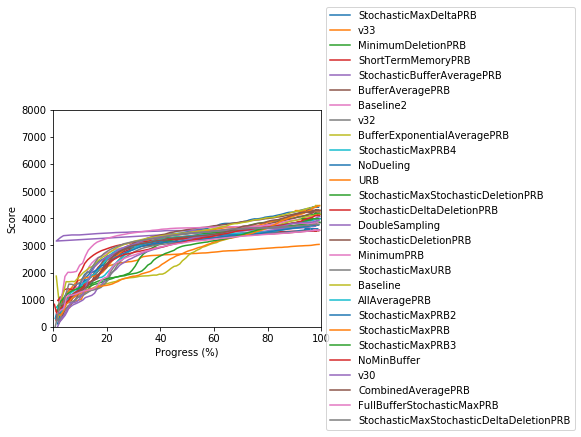

In [20]:
compare_scores(agents_data)

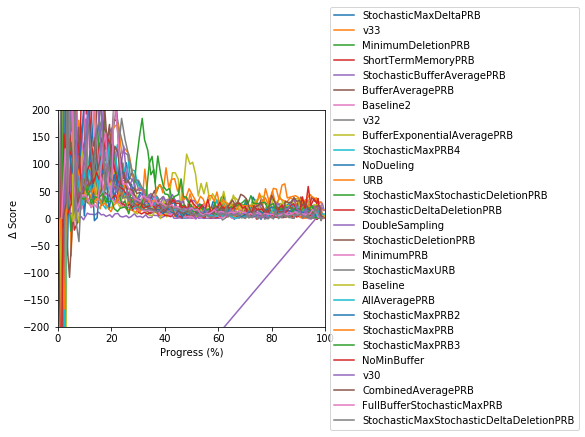

In [21]:
compare_delta_scores(agents_data)